- Nombre 1: Juan José Guzmán Mejía
- Nombre 2: Jhon Alex Montealegre

![Unviersidad de los Andes](Logo_Uniandes.svg)

# Departamento de Ingeniería Mecánica
## IMEC 2001 - Herramientas Computacionales
### Taller 1 - Interpolación y Raices

----
### **<span style="color:#A1CCD1;">Condiciones de la entrega </span>**
----
**1. Fechas de entrega:**
- Nota sobre 5.00 ->  <span style="color:red;">3 de Septiembre a las 23:59, 2023</span>
- Nota sobre 4.00 ->  <span style="color:red;">4 de Septiembre a las 23:59, 2023</span>

**2. Colocar el nombre de los integrantes en la casilla correspondiente<br>**
**3. La entrega del taller es por Bloque Neon y se envía el archivo en formato de Jupyter Notebook (extensión `.ipynb`)<br>**
**4. El nombre del archivo debe ser:**
- Si trabajó en parejas:`T#_ApellidosIntegrante1_ApellidosIntegrante2` (Ej: `T#_Salamanca_VargasTorres`)
- Si trabajó individual: `T#_Apellido` (Ej: `T#_VargasTorres`)

**5. Comente el código con el proceso que realizó para llegar a la solución.<br>**
**6. <span style="color:red;"> Si se detecta copia con otro de los talleres enviados, automáticamente la nota para los grupos involucrados es 0. </span>**


----
### **<span style="color:#A1CCD1;">Condiciones para el segundo envío </span>**
----
<div class='alert alert-block alert-info'>   

<i class='fa fa-info-circle' aria-hidden='true'></i>
Para poder realizar un segundo envío con correcciones, la nota del **primer envío** debe estar mínimo en **Aprendiz**.
</div>

----
### **Tabla de contenido**
----
### Sección 1: Interpolación [→](#section1)
- 1.1. Punto 1: Interpolación puntos aleatorios
- 1.2. <font color="#276C9B"> Punto 2: Interpolación ciencia de materiales </font> [→](#exercise1)

### Sección 2: Raíces – Solución de Ecuaciones No Lineales [→](#section2)
- 2.1. Raices identificando los puntos
- 2.2. Esfuerzo de fluencia


In [141]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [142]:
# No edite este código
def formato_grafica(ax, fig, titulo= "", x_label= "", y_label= "", leyenda=False, xlim=[None, None], ylim=[None, None]):

    ax.set_title(titulo)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

    ax.tick_params(direction='out', length=5, width=0.75, grid_alpha=0.3)

    # Utilizarlo si se necesita alguna rotación en los labels de los ejes
#     ax.set_xticklabels(ax.get_xticks(), rotation = 0)
#     ax.set_yticklabels(ax.get_yticks(), rotation = 0)
    ax.set_xlim(xlim[0], xlim[1])
    ax.set_ylim(ylim[0], ylim[1])

    # Grid de la gráfica
    ax.grid(True)
    ax.grid(visible=True, which='major', color='grey', linestyle='-')
    ax.minorticks_on()
    ax.grid(visible=True, which='minor', color='lightgrey', linestyle='-', alpha=0.2)

    if leyenda == True:
        ax.legend(loc='best', fontsize= 7)

    fig.tight_layout()



## **Punto 1 - Sección Interpolación**
----
<div class='alert alert-block alert-info'>   

<i class='fa fa-info-circle' aria-hidden='true'></i>
A continuación tiene 3 conjuntos de datos para los cuales debe:
1. Utiliza la función de numpy np.arange para generar los puntos x de cada conjunto, estos van de 0 a la longitud de cada uno.
2. Grafique cada conjunto de datos utilizando [``plt.scatter()``](https://realpython.com/visualizing-python-plt-scatter/)
3. Como puede observar, cada gráfica tiene un comportamiento diferente, teniendo que hay un método de interpolación que da una mejor aproximación. Seleccione **3** métodos de interpolación **uno** para cada conjunto de datos (deben ser distintos) y realice la interpolación.
4. Grafique en un subplot los puntos que utilizó para la interpolación y los que obtuvo para cada conjunto.

**Bono:** Para el punto 3 utilizar las funciones de las interpolaciones en una función, intente generalizarla (que funcione para cualqueir caso). Siga el siguiente formato:
``` Python
def fun_1(param_1: tipo, param_2: tipo, ....)-> tipo que se retorna:
    """
    Descripción de la función

    Parameters
    ----------
    param_1 : tipo
        Descripción del parámetro
    param_2 : tipo
        Descripción del parámetro

    Returns
    -------
    variable : tipo
        Descripción de la variable
    """
    Variables y operaciones con el método de interpolación seleccionado
```
</div>



In [143]:
# Conjuntos de datos
datos_1 = np.array([  0. ,   62.5,  250. ,  562.5, 1000.])
datos_2 = np.array([0.00000000e+00, 9.82812500e+02, 3.12750000e+04, 2.37360938e+05,
                    1.00010000e+06, 3.05191406e+06, 7.59397500e+06, 1.64133922e+07,
                    3.20004000e+07])
datos_3 = np.array([0.        ,   6.12244898,  12.24489796,  18.36734694,
                    24.48979592,  30.6122449 ,  36.73469388,  42.85714286,
                    48.97959184,  55.10204082,  61.2244898 ,  67.34693878,
                    73.46938776,  79.59183673,  85.71428571,  91.83673469,
                    97.95918367, 104.08163265, 110.20408163])

In [144]:
# 1.1. Generar puntos en x
x_1 = np.arange(0,len(datos_1),1)
x_2 = np.arange(0,len(datos_2),1)
x_3 = np.arange(0,len(datos_3),1)

Text(0.5, 1.0, 'Datos 3')

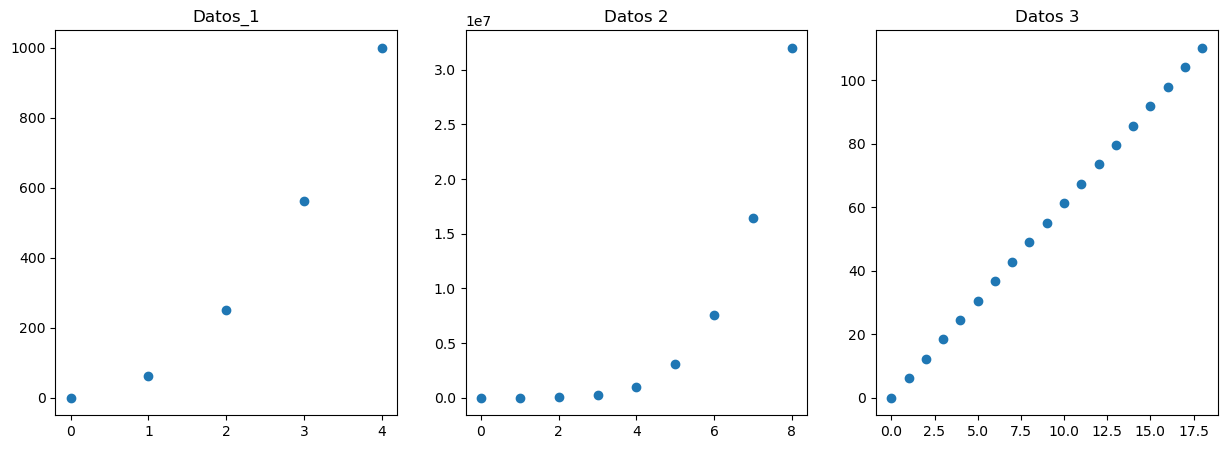

In [145]:
# 1.2. Gráficar en un subplot 3 columnas - 1 fila
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].scatter(x_1,datos_1)
ax[0].set_title('Datos_1')

ax[1].scatter(x_2,datos_2)
ax[1].set_title('Datos 2')

ax[2].scatter(x_3,datos_3)
ax[2].set_title('Datos 3')

In [146]:
# Importar librerías para la interpolación
import scipy
import sympy as sym
x = sym.Symbol("x",real=True)

In [147]:
# 1.3. Métododo interpolación
def Interpolation(x_:np.array,y_:np.array,x_new:np.array,n:int,libreria:str)->np.array:
    """
    Función que se encarga de interpolar un conjunto de datos (coordendas/puntos)
    mediante tres tipos de métodos de interpolación: scipy.interpolate.splrep,
    np.polyfit y sym.interpolating_spline

    Parameters
    ----------
    x : np.array
        Valores de x de los puntos a interpolar
    y : np.array
        Valores de y de los puntos a interpolar
    x_new : np.array
        Un np.linspace o np.arange que va desde el valor inicial
        de x a su valor final con cualquier número de valores intermedios
    n : int
        Un número entero que representa el grado de los polinomios
        que se utilizarán para la interpolación
    libreria : str
        Un string que recibe "scipy", "numpy" y "sympy" para usar los
        distintos tipos de métodos de interpolación
    Returns
    -------
    y_new : np.array
        Nuevos valores de y que corresponden a la interpolación
    """
    x = sym.Symbol("x",real=True)

    if libreria == "scipy":
      itp_spline= scipy.interpolate.splrep(x_, y_, k=n)
      y_new = scipy.interpolate.splev(x_new, tck=itp_spline)

    elif libreria == "numpy":
      params = np.polyfit(x_,y_,n)
      y_new = np.poly1d(params)(x_new)
    elif libreria == "sympy":
      sym_spline = sym.interpolating_spline(n,x,x_,y_)
      func = sym.lambdify(x,sym_spline)
      y_new = func(x_new)

    else:
      return "Inserte un libreria correcta"

    return y_new




In [148]:
# Interpolación datos 1
xt_1 = np.linspace(x_1[0],x_1[-1],100)
y_interpolate1 = Interpolation(x_1,datos_1,xt_1,3,"sympy")

# Interpolación datos 2
xt_2 = np.linspace(x_2[0],x_2[-1],100)
y_interpolate2 = Interpolation(x_2,datos_2,xt_2,3,"scipy")

# Interpolación datos 3
xt_3 = np.linspace(x_3[0],x_3[-1],100)
y_interpolate3 = Interpolation(x_3,datos_3,xt_3,1,"numpy")

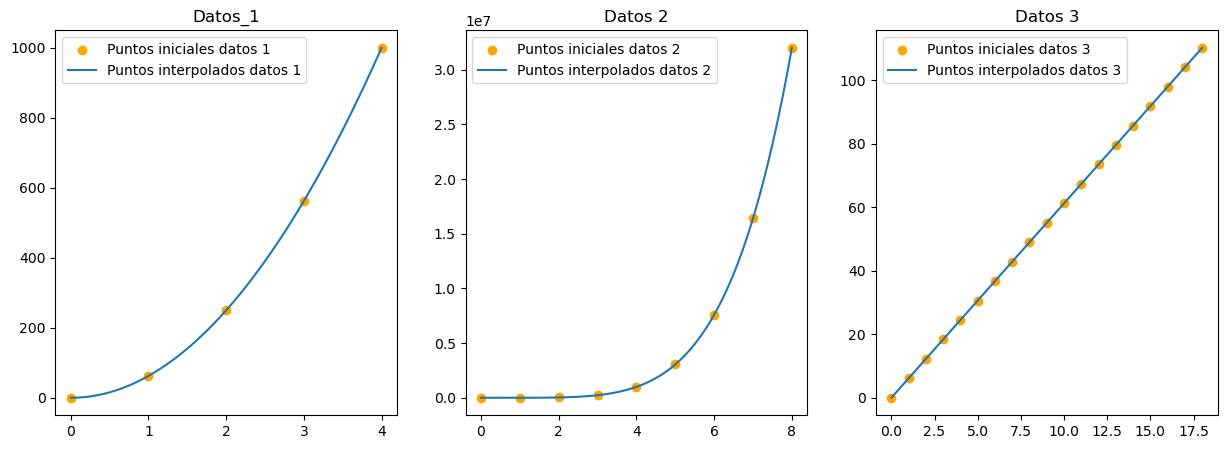

In [149]:
# 1.4. Gráficar los datos interpolados
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].scatter(x_1,datos_1,label="Puntos iniciales datos 1",color="orange")
ax[0].plot(xt_1,y_interpolate1,label="Puntos interpolados datos 1")
ax[0].set_title('Datos_1')
ax[0].legend()


ax[1].scatter(x_2,datos_2,label="Puntos iniciales datos 2",color="orange")
ax[1].plot(xt_2,y_interpolate2,label="Puntos interpolados datos 2")
ax[1].set_title('Datos 2')
ax[1].legend()


ax[2].scatter(x_3,datos_3,label="Puntos iniciales datos 3",color="orange")
ax[2].plot(xt_3,y_interpolate3,label="Puntos interpolados datos 3")
ax[2].set_title('Datos 3')
ax[2].legend()


----
## Punto 2
----

Algunas de las cargas que se pueden encontrar en la ingeniería son de tensión, compresión, torsión y cortante, para el taller se trabajará con el primero. Una de las pruebas que se le realizan a los materiales es la prueba de tensión en donde se deforma la probeta aplicando una carga axial hasta que se llega a la fractura como se muestra en la siguiente imagen:


<p align="center">
<img src=./img/ensayo_tension.jpg width="20%">
</p>

Ahora, se quiere encontrar el esfuerzo de tracción, el cual está definido como:
$$\sigma = \frac{F}{A_0}$$

Siendo $F$ la fuerza que está siendo aplicada y $A$ el área de la sección transversal, de la cual su fórmula para este caso está dada por:

$$A_0 = \pi r^2$$
<p align="center">
<img src=./img/tension.jpg width="20%">
</p>

Ahora, para la deformación unitaria, definida como el cambio entre la longitud inicial y la final, sobre la inicial:

$$\epsilon = \frac{l_i - l_0}{l_0} $$


<div class='alert alert-block alert-info'>   

<i class='fa fa-info-circle' aria-hidden='true'></i>
Se quiere reconstruir la curva de Esfuerzo - Deformación del aluminio 6063, la probeta tiene un diámetro de 9 mm y una longitud inicial de 25 mm.

Como puede observar, se tienen comportamientos distintos en cada una de las secciones, al igual que en el ejercicio anterior, debe poder recrear la curva utilizando las diferentes funciones de interpolación (si realizó las funciones de la sección pasada las puede utilizar en este punto). Los datos que se suministran para el ejercicio son de fuerza, el tiempo y la extensión de tracción medida por el equipo.

**2.1. Importe el csv que se encuentra en el repositorio**
- Tenga en cuenta que se tienen dos headers, revise la documentación para presentar un dataFrame con ambos.
- Agregue **encoding='utf-8'** para que se cargue correctamente el archivo.

**2.2. Creación DataFrame <br>**
- Con los datos dados cree un DataFrame con los cuales sus columnas sean: (Fuerza, Deformación).
- Encuentre el esfuerzo y la deformación **unitaria** de los datos dados con las fórmulas dadas, estos datos deben quedar en el DataFrame creado como nuevas columnas.
- **Importante:** Para la deformación unitaria ya se le dan los datos de cuánto se deformó por lo que debe tomar la longitud inicial y dividirla entre el número respectivo.

**2.3. Grafique los puntos y comente cuáles funciones junto con su librería utilizaría para interpolar cada sección junto con una justificación <br>**
**2.4. Interpole los datos <br>**
**2.5. Grafique la curva con los datos dados y la de los datos del csv.**
- Con esto puede comprobar si su interpolación fue correcta y se acerca a la original.


**Recomendaciones:**
- Divida correctamente los datos para cada sección.

</div>


In [150]:
# 1. Importe los datos del csv [Tenga en cuenta que se tienen 2 headers]

Dataframe = pd.read_csv("Aluminio_6063.csv",header=[0,1],encoding='utf-8')
Dataframe

,Tiempo,Carga,Extensión de tracción
,(s),(N),(mm)
0,0.00000,-0.00466,-0.00006
1,0.10000,78.85341,0.00041
2,0.20000,286.87579,0.00162
3,0.30000,443.49634,0.00261
4,0.40000,594.50763,0.00342
...,...,...,...
1320,132.00000,5899.48535,8.38014
1321,132.10001,5606.58936,8.38855
1322,132.20000,5305.30371,8.39691


In [151]:
# 2. Datos iniciales
Deformacion = Dataframe["Extensión de tracción"]["(mm)"].to_list()
Fuerza = Dataframe["Carga"]["(N)"].to_list()

data = pd.DataFrame({"Deformacion (mm)":Deformacion,"Fuerza (N)":Fuerza})

In [152]:
# 3. Calcular área
A = np.pi*(9/2)**2

In [153]:
# 4. Encontrar esfuerzo y deformación  [Se deja el DataFrame con un header]
data["Esfuerzo (N/mm2)"] = np.array(Fuerza)/A
data["Deformacion unitaria"] = np.array(Deformacion)/25
data

,Deformacion (mm),Fuerza (N),Esfuerzo (N/mm2),Deformacion unitaria
0,-0.00006,-0.00466,-0.000073,-0.000002
1,0.00041,78.85341,1.239497,0.000016
2,0.00162,286.87579,4.509402,0.000065
3,0.00261,443.49634,6.971322,0.000104
4,0.00342,594.50763,9.345069,0.000137
...,...,...,...,...
1320,8.38014,5899.48535,92.734050,0.335206
1321,8.38855,5606.58936,88.130016,0.335542
1322,8.39691,5305.30371,83.394105,0.335876
1323,8.40521,4989.75439,78.433983,0.336208


Text(0, 0.5, 'Esfuerzo [MPa]')

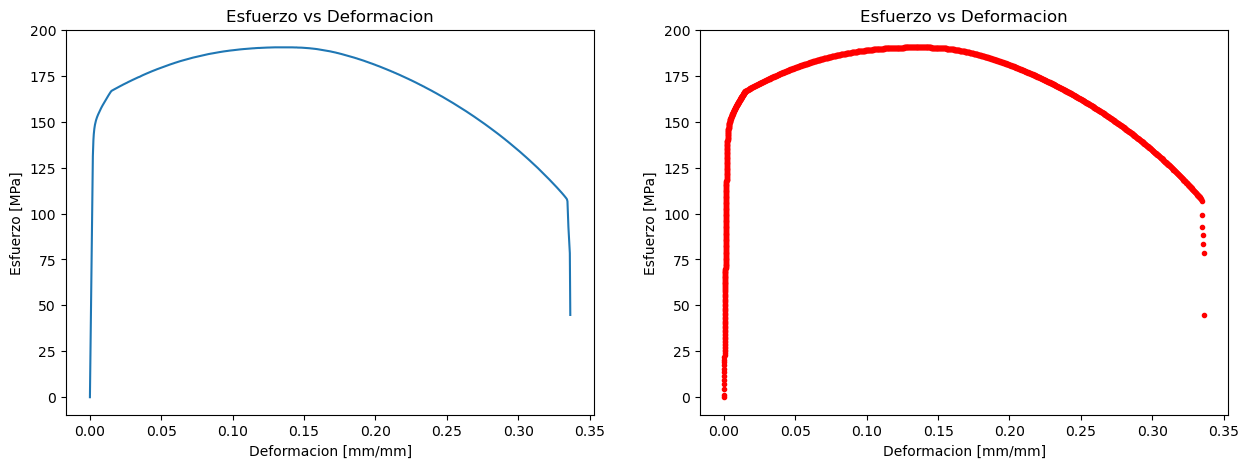

In [154]:
# 5. Gráfica esfuerzo vs deformación
# %matplotlib inline
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[1].scatter(data["Deformacion unitaria"],data["Esfuerzo (N/mm2)"],marker=".",color="red")
ax[1].set_title("Esfuerzo vs Deformacion")
ax[1].set_xlabel("Deformacion [mm/mm]")
ax[1].set_ylabel("Esfuerzo [MPa]")

ax[0].plot(data["Deformacion unitaria"],data["Esfuerzo (N/mm2)"])
ax[0].set_title("Esfuerzo vs Deformacion")
ax[0].set_xlabel("Deformacion [mm/mm]")
ax[0].set_ylabel("Esfuerzo [MPa]")


Para realizar la división del conjunto de datos utilice la siguiente función, tenga en cuenta que este es un ejemplo, debe especificar los límites:

``` pyhton

df[df.apply(lambda x: num_sup >= x['Deformación']>= num_inf axis=1)]
```


In [155]:
# Conjuntos de datos
part1 = data[data.apply(lambda x: 0.015 >= x['Deformacion unitaria']>= 0, axis=1)]
part2 = data[data.apply(lambda x: 0.3345 >= x['Deformacion unitaria']>= 0.015, axis=1)]
part3 = data[data.apply(lambda x: 0.35 >= x['Deformacion unitaria']>= 0.3345, axis=1)]

Text(0, 0.5, 'Esfuerzo [MPa]')

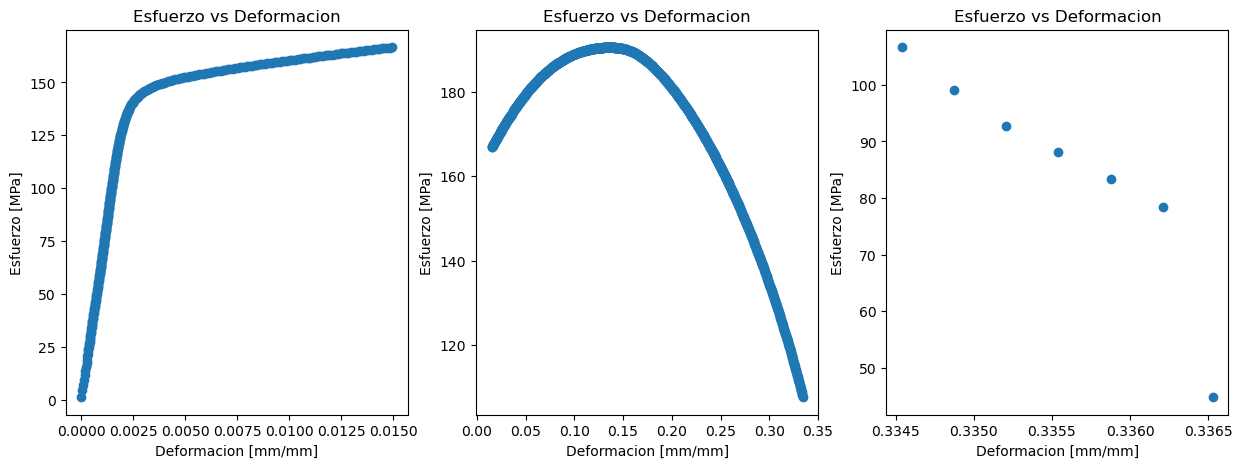

In [156]:
# Subplot (1x3) de cada tramo
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].scatter(part1["Deformacion unitaria"],part1["Esfuerzo (N/mm2)"])
ax[0].set_title("Esfuerzo vs Deformacion")
ax[0].set_xlabel("Deformacion [mm/mm]")
ax[0].set_ylabel("Esfuerzo [MPa]")

ax[1].scatter(part2["Deformacion unitaria"],part2["Esfuerzo (N/mm2)"])
ax[1].set_title("Esfuerzo vs Deformacion")
ax[1].set_xlabel("Deformacion [mm/mm]")
ax[1].set_ylabel("Esfuerzo [MPa]")

ax[2].scatter(part3["Deformacion unitaria"],part3["Esfuerzo (N/mm2)"])
ax[2].set_title("Esfuerzo vs Deformacion")
ax[2].set_xlabel("Deformacion [mm/mm]")
ax[2].set_ylabel("Esfuerzo [MPa]")

In [157]:
# Selección de las columnas de interés ¿Cuáles son?
columnas = ["Esfuerzo (N/mm2)",	"Deformacion unitaria"]

In [158]:
# DataFrame conjunto 1
part1[columnas]

,Esfuerzo (N/mm2),Deformacion unitaria
1,1.239497,0.000016
2,4.509402,0.000065
3,6.971322,0.000104
4,9.345069,0.000137
5,11.551502,0.000168
...,...,...
355,166.102575,0.014449
356,166.256695,0.014567
357,166.402280,0.014700
358,166.528140,0.014828


In [159]:
# DataFrame conjunto 2
part2[columnas]

,Esfuerzo (N/mm2),Deformacion unitaria
360,166.823884,0.015204
361,166.989241,0.015536
362,167.130390,0.015873
363,167.262420,0.016207
364,167.382446,0.016535
...,...,...
1313,109.144823,0.332870
1314,108.821279,0.333204
1315,108.489392,0.333536
1316,108.143090,0.333873


In [160]:
# DataFrame conjunto 3
part3[columnas]

,Esfuerzo (N/mm2),Deformacion unitaria
1318,106.658365,0.334541
1319,99.178850,0.334876
1320,92.734050,0.335206
1321,88.130016,0.335542
1322,83.394105,0.335876
1323,78.433983,0.336208
1324,44.793336,0.336530


In [161]:
# Función para la selección de datos aleatorios[¡No modifique esta función!]
def newData(data_s_c: pd.DataFrame, c: pd.DataFrame, col_1: str, col_2: str, percentage: float):
    """
    Función para la selección de datos aleatorios dados un porcentaje

    Parameters
    ----------
    data_s_c : pd.DataFrame
        Conjunto de datos con las columnas especificadas
    c : pd.DataFrame
        Conjunto completo de los datos
    col_1 : str
        Primera columna de interés
    col_2 : str
        Segunda columna de interés
    percentage : float
        Porcentaje de los datos que se quiere incluir

    Returns
    -------
    data_s_c1_ : pd.DataFrame
        Datos aleatorios del conjunto de datos
    """
    data_s_c1 = c[[col_1, col_2]]
    data_s_c1_ = data_s_c.head(1)
    data_s_c1_ = pd.concat([data_s_c1_,
                       c[[col_1, col_2]].sample(n=int(np.round(len(c[col_1])*percentage,0)), random_state=1)])
    data_s_c1_.sort_index(inplace=True)
    data_s_c1_ = pd.DataFrame(np.insert(data_s_c1_.values, len(data_s_c1_),
                                        values=list(data_s_c1.iloc[-1]),
                                        axis=0), columns = [col_1, col_2])
    data_s_c1_ = data_s_c1_.drop_duplicates()
    data_s_c1_ = data_s_c1_.reset_index(drop=True)
    return data_s_c1_


Seleccionados los 3 conjuntos de datos se debe disminuir la cantidad de puntos para realizar el ejercicio de la interpolación, por lo que utilizando la función anterior [**newData**] debe utilizar los siguientes porcentajes según el conjunto de datos:
- Conjunto 1: 20%
- Conjunto 2: 4%
- Conjunto 3: 100% [Si tiene más de 19 datos disminuya a 80%]

In [162]:
# Datos seleccionados tramo 1
part1_new = newData(part1[columnas],data,"Esfuerzo (N/mm2)","Deformacion unitaria",0.2)
part1_new = part1_new[part1_new.apply(lambda x: 0.015 >= x['Deformacion unitaria']>= 0, axis=1)]

In [163]:
# Datos seleccionados tramo 2
part2_new = newData(part2[columnas],data,"Esfuerzo (N/mm2)","Deformacion unitaria",0.04)
part2_new = part2_new[part2_new.apply(lambda x: 0.335 >= x['Deformacion unitaria']>= 0.015, axis=1)]


In [164]:
# Datos seleccionados tramo 3
part3_new = newData(part3[columnas],data,"Esfuerzo (N/mm2)","Deformacion unitaria",1)
part3_new = part3_new[part3_new.apply(lambda x: 0.35 >= x['Deformacion unitaria']>= 0.335, axis=1)]


Text(0, 0.5, 'Esfuerzo [MPa]')

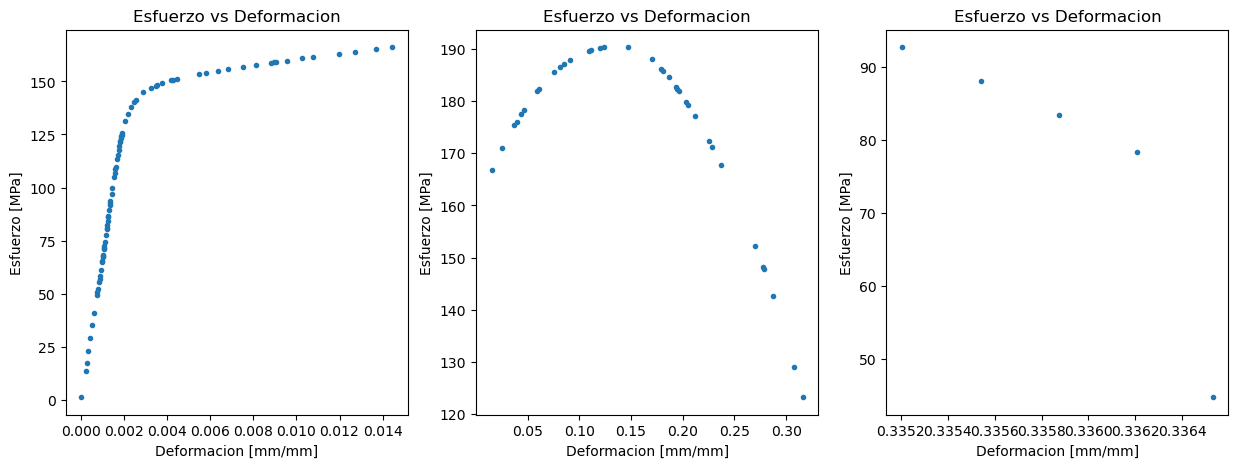

In [165]:
# Evaluar el comportamiento de cada tramo con los datos seleccionados
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].scatter(part1_new["Deformacion unitaria"],part1_new["Esfuerzo (N/mm2)"],marker=".")
ax[0].set_title("Esfuerzo vs Deformacion")
ax[0].set_xlabel("Deformacion [mm/mm]")
ax[0].set_ylabel("Esfuerzo [MPa]")

ax[1].scatter(part2_new["Deformacion unitaria"],part2_new["Esfuerzo (N/mm2)"],marker=".")
ax[1].set_title("Esfuerzo vs Deformacion")
ax[1].set_xlabel("Deformacion [mm/mm]")
ax[1].set_ylabel("Esfuerzo [MPa]")

ax[2].scatter(part3_new["Deformacion unitaria"],part3_new["Esfuerzo (N/mm2)"],marker=".")
ax[2].set_title("Esfuerzo vs Deformacion")
ax[2].set_xlabel("Deformacion [mm/mm]")
ax[2].set_ylabel("Esfuerzo [MPa]")

In [166]:
# Datos de x y y para cada conjunto de datos [Se recomienda pasarlo a un array después de seleccionar la columna del DatFrame]
x_datos1 = np.array(part1_new["Deformacion unitaria"])
y_datos1 = np.array(part1_new["Esfuerzo (N/mm2)"])
x1_ = np.linspace(x_datos1[0],x_datos1[-1],100)

x_datos2 = np.array(part2_new["Deformacion unitaria"])
y_datos2 = np.array(part2_new["Esfuerzo (N/mm2)"])
x2_ = np.linspace(x_datos2[0],x_datos2[-1],100)

x_datos3 = np.array(part3_new["Deformacion unitaria"])
y_datos3 = np.array(part3_new["Esfuerzo (N/mm2)"])
x3_ = np.linspace(x_datos3[0],x_datos3[-1],100)

In [167]:
# Realizar interpolación
y1_interpolate = Interpolation(x_datos1,y_datos1,x1_,3,"scipy")
y2_interpolate = Interpolation(x_datos2,y_datos2,x2_,3,"scipy")
y3_interpolate = Interpolation(x_datos3,y_datos3,x3_,3,"scipy")

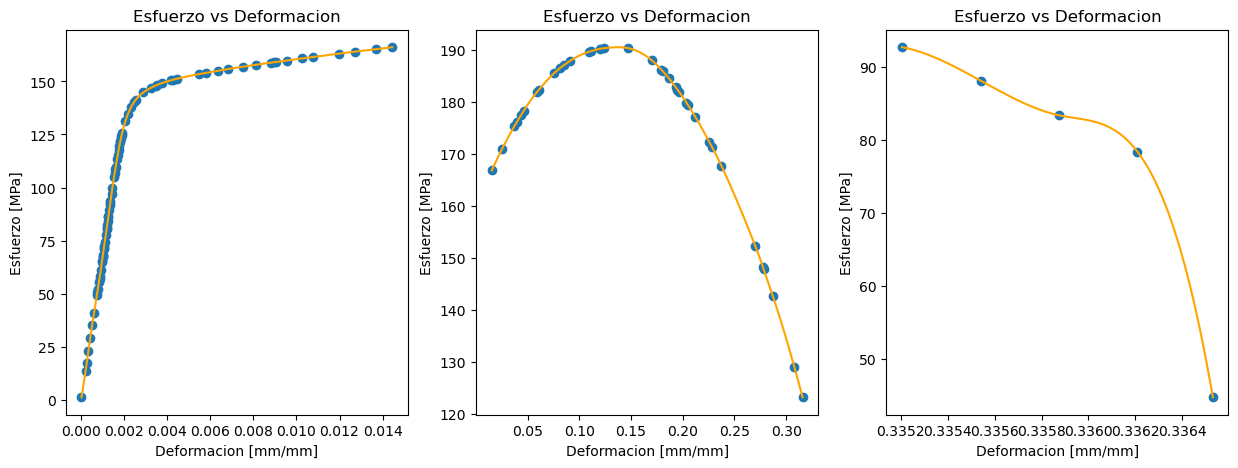

In [168]:
# Evaluar el comportamiento de cada tramo

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].plot(x1_,y1_interpolate,color="orange")
ax[0].set_title("Esfuerzo vs Deformacion")
ax[0].set_xlabel("Deformacion [mm/mm]")
ax[0].set_ylabel("Esfuerzo [MPa]")
ax[0].scatter(x_datos1,y_datos1)

ax[1].plot(x2_,y2_interpolate,color="orange")
ax[1].set_title("Esfuerzo vs Deformacion")
ax[1].set_xlabel("Deformacion [mm/mm]")
ax[1].set_ylabel("Esfuerzo [MPa]")
ax[1].scatter(x_datos2,y_datos2)

ax[2].plot(x3_,y3_interpolate,color="orange")
ax[2].set_title("Esfuerzo vs Deformacion")
ax[2].set_xlabel("Deformacion [mm/mm]")
ax[2].set_ylabel("Esfuerzo [MPa]")
ax[2].scatter(x_datos3,y_datos3)

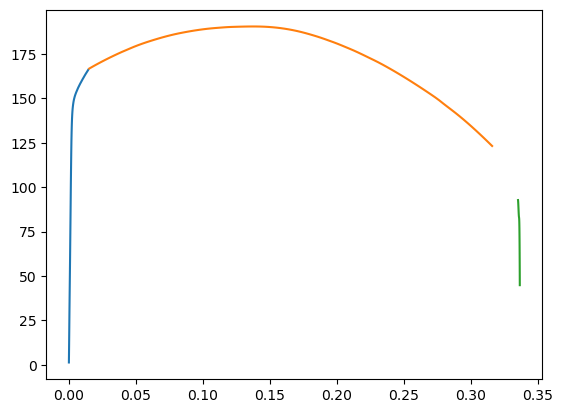

In [169]:
# Evaluar el comportamiento de cada tramo en conjunto [Debe poder reconstruir la curva]
plt.plot(x1_,y1_interpolate)
plt.plot(x2_,y2_interpolate)
plt.plot(x3_,y3_interpolate)

## **Punto 3 - Sección Raíces**
----

<p align="center">
<img src=./img/Ejercicio_2.png width="30%">
</p>


En la figura anterior tiene dos curvas con las cuales debe:
1. Obtener datos de x y y de cada una
2. Interpole los datos (Esto con el fin de aproximar mejor la solución)
2. Utilizando la librería polyfit de numpy y los datos del literal anterior encuentre las ecuaciones de las curvas.
3. Teniendo las ecuaciones diga cuál sería la raíz para este caso.
4. Encuentre la raíz utilizando las ecuaciones encontradas.


In [170]:
# Puntos con las curvas
x_curve1 = np.array([-2,-1.5,-1,0,0.5,1,1.5])
y_curve1 = np.array([-3,-4.5,-5.5,-6,-5.5,-4.5,-3])

x_curve2 = np.array([-1,-0.5,0,0.5,1,1.5])
y_curve2 = np.array([-6,-5.5,-5,-4.5,-4,-3.5])
# Ineterpolación de los puntos
curve1 = np.polyfit(x_curve1,y_curve1,2)
curve2 = np.polyfit(x_curve2,y_curve2,1)


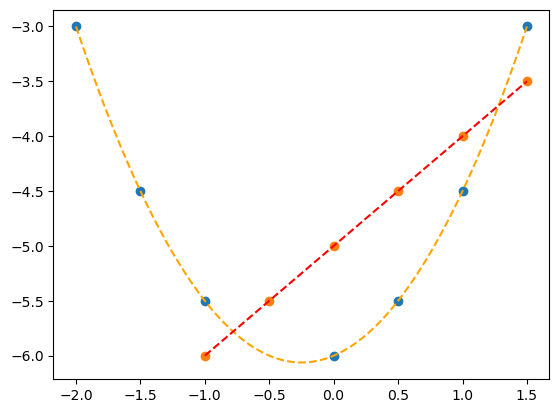

In [171]:
# Graficar puntos [Reconstrucción de la gráfica inicial]
x1_new = np.linspace(x_curve1[0],x_curve1[-1],100)
x2_new = np.linspace(x_curve2[0],x_curve2[-1],100)

params1 = np.poly1d(curve1)
params2 = np.poly1d(curve2)
y1_new = params1(x1_new)
y2_new = params2(x2_new)

plt.plot(x1_new,y1_new,linestyle="--",color="orange")
plt.plot(x2_new,y2_new,linestyle="--",color="red")

plt.scatter(x_curve1,y_curve1)
plt.scatter(x_curve2,y_curve2)

In [172]:
def GetModel(x,p):
  y = 0
  for n in range(len(p)):
    y += p[n]*x**n

  return y

In [173]:
# Encontrar ecuaciones curva 1
function1 = GetModel(x,list(params1)[::-1])
function1

1.0*x**2 + 0.5*x - 6.0

In [174]:
# Encontrar ecuaciones curva 2
function2 = GetModel(x,list(params2)[::-1])
function2

1.0*x - 5.0

In [175]:
# Encontrar raices
roots = sym.solve(function1 - function2)
roots

[-0.780776406404415, 1.28077640640442]

## Punto 4
----

Uno de los puntos importantes que se obtienen con la curva esfuerzo vs deformación es el esfuerzo de fluencia $S_{y}$, este se define como el esfuerzo máximo que se puede desarrollar en un material sin causar una deformación plástica[1]. Este se puede encontrar trazando una línea paralela y que parte desde el 0.002 en el eje x que es el que tiene la deformación, cuando se interseca con la curva original del material es cuando se obtiene su valor.

1. Utilizando algunos puntos del primer tramo del punto 2, encuentre el módulo de Young.
- Para que no se tengan errores con la función de *polyfit* utilizar con los valores escogidos utilice np.array(x).reshape(-1,).
2. Se quiere encontrar el esfuerzo de Fluencia para lo cual de los puntos que seleccionó anteriormente al ser un array:
- 2.1. En una nueva variable sumele a la deformación 0.002.
- 2.2. Encuentre la ecuación utilzando los nuevos x (deformacion) y el y (Esfuerzo) del literal 1.
- 2.3. Para realizar la paralela y que cruce la curva inicial defina una variable que van a ser los nuevos puntos x utilizando como punto inicial el x[0] de la deformación desplazada.
- 2.4. Evalúe los valores del 2.3. en la ecuación del punto 2.2.

3. Grafique la recta encontrada junto con la gráfica de esfuerzo deformación del tramo correspondiente.
4. Como puede evidenciar en donde se corta con la curva original si se delimita entre 0.00314 y 0.008 se tiene una recta. Encuentre la ecuación de esta recta.
5. En este caso se encuentra que se tiene un problema de raices, siendo esta en donde se intersecan las rectas. Encuentre el esfuerzo de fluencia del material y compare con la literatura.


[1] https://www.instron.com/es-es/resources/glossary/y/yield-strength

Text(0, 0.5, 'Esfuerzo [MPa]')

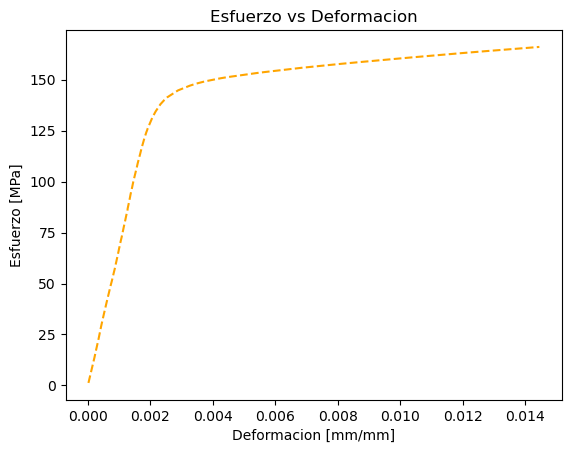

In [176]:
#Punto 1.1. Selección datos x y y para encontrar el módulo de Young
plt.plot(x_datos1,y_datos1,linestyle="--",color="orange")
plt.title("Esfuerzo vs Deformacion")
plt.xlabel("Deformacion [mm/mm]")
plt.ylabel("Esfuerzo [MPa]")

In [177]:
section1 = part1_new[part1_new.apply(lambda x: 0.0015 >= x['Deformacion unitaria']>= 0, axis=1)]

x_section1 = np.array(section1["Deformacion unitaria"])
y_section1 = np.array(section1["Esfuerzo (N/mm2)"])
x_plot1 = np.linspace(x_section1[0],x_section1[-1],100)

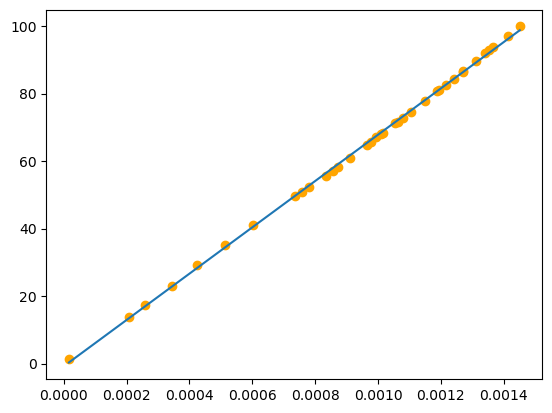

In [178]:
# Encontrar ecuación de la recta [Módulo de Young]
recta_young1 = np.poly1d(np.polyfit(x_section1,y_section1,1))
plt.plot(x_plot1,recta_young1((x_plot1)))
plt.scatter(x_section1,y_section1,color="orange")

68616.738119463*x - 138.014463124985

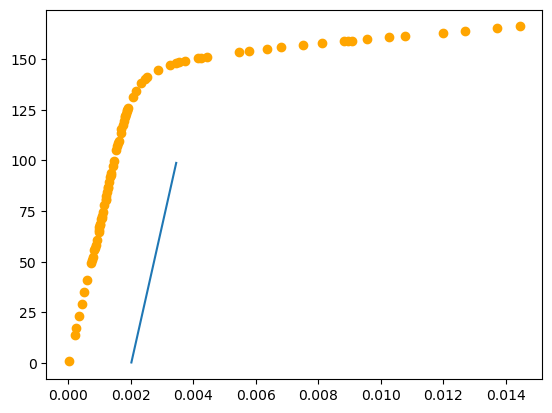

In [179]:
# 2.1. Desplazar la gráfica al 0.0002
recta_young2 = np.poly1d(np.polyfit(x_section1+0.002,y_section1,1))
plt.plot(x_plot1+0.002,recta_young2((x_plot1+0.002)))
plt.scatter(x_datos1,y_datos1,color="orange")

# 2.2. Encontrar la ecuación

curve_young = GetModel(x,np.polyfit(x_section1+0.002,y_section1,1)[::-1])
curve_young

In [180]:
# 2.3. - 2.4. Creación de datos para graficar
x_young = np.linspace(0.002,0.005)
save_curve_young = sym.lambdify(x,curve_young)
y_young = save_curve_young(x_young)

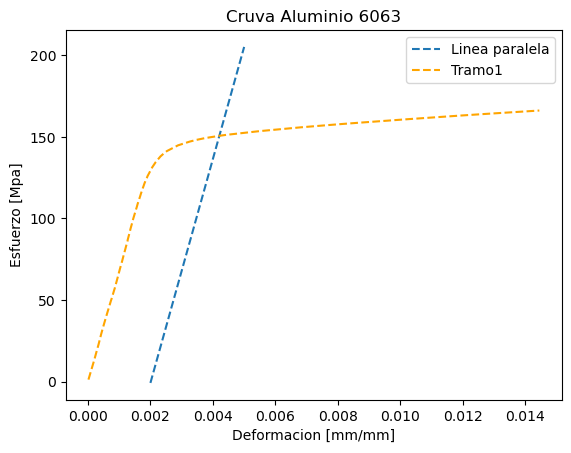

In [181]:
# 3. Gráfica
plt.plot(x_young,y_young,linestyle="--",label="Linea paralela")
plt.plot(x_datos1,y_datos1,color="orange",linestyle="--",label="Tramo1")
plt.title("Cruva Aluminio 6063")
plt.xlabel("Deformacion [mm/mm]")
plt.ylabel("Esfuerzo [Mpa]")
plt.legend()

In [182]:
# 4. Delimitar rangos esfuerzo deformación del tramo de interés

section2 = part1_new[part1_new.apply(lambda x: 0.015 >= x['Deformacion unitaria']>= 0.003, axis=1)]

x_section2 = np.array(section2["Deformacion unitaria"])
y_section2 = np.array(section2["Esfuerzo (N/mm2)"])
x_plot2 = np.linspace(x_section2[0],x_section2[-1],100)


1646.09998388548*x + 143.654394334799

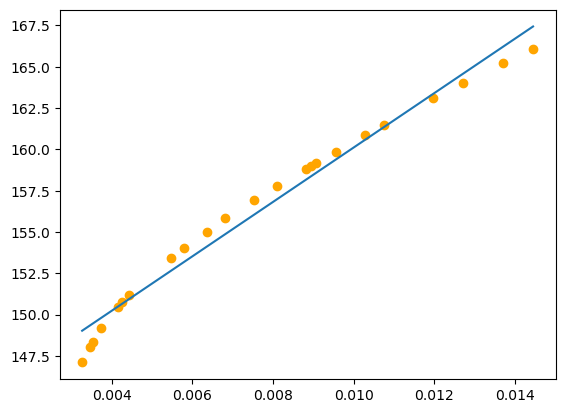

In [183]:
# 4.1. Encontrar ecuación de la recta
recta_section2 = np.poly1d(np.polyfit(x_section2,y_section2,1))
plt.plot(x_plot2,recta_section2((x_plot2)))
plt.scatter(x_section2,y_section2,color="orange")

curve_section2 = GetModel(x,np.polyfit(x_section2,y_section2,1)[::-1])
curve_section2

In [184]:
# 5. Encontrar Raiz
sym.solve(curve_young-curve_section2)

[0.00420585595868992]